In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [11]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [12]:
acc = []
model = []

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)


# Decision Tree


In [31]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=1,max_depth=7)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
pred1 = metrics.accuracy_score(Ytest, predicted_values)
acc.append(pred1)
model.append('Decision Tree')

print("DecisionTrees's Accuracy is: ", pred1*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  98.4090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.96      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [34]:
score

array([0.98863636, 0.96363636, 0.98636364, 0.98636364, 0.96818182])

In [35]:
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

In [36]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = DecisionTree.predict(data)
print(prediction)

['coffee']


In [37]:
data = np.array([[42,58, 24, 24.603016, 53.2, 7.6, 132.65]])
prediction = DecisionTree.predict(data)
print(prediction)

['pigeonpeas']



# Naive bayes Classifier


In [38]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [39]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
gnbmodel = GaussianNB()


In [42]:
gnbmodel.fit(Xtrain,Ytrain)

GaussianNB()

In [43]:
y_pred = gnbmodel.predict(Xtest)
predicted_values = gnbmodel.predict(Xtest)

pred2=metrics.accuracy_score(Ytest, y_pred)
acc.append(pred2)
model.append('Gaussian Naive Bayes')

In [44]:
print(" Gaussian Naive Bayes' Accuracy is: ", pred2*100,"%")

print(classification_report(Ytest,predicted_values))

 Gaussian Naive Bayes' Accuracy is:  99.0909090909091 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00  

In [45]:
score = cross_val_score(gnbmodel, features, target,cv=5)
print(score)

[0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [46]:
import pickle
GNB_pkl_filename = 'NaiveBayes.pkl'
GNB_Model_pkl = open(GNB_pkl_filename, 'wb')
pickle.dump(gnbmodel, GNB_Model_pkl)
GNB_Model_pkl.close()

In [47]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = gnbmodel.predict(data)
print(prediction)

['coffee']



# Random Forest


In [48]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [49]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
randomfclf=RandomForestClassifier(n_estimators=100,criterion='gini')
randomfclf.fit(Xtrain,Ytrain)
Ypred=randomfclf.predict(Xtest)
pred3=metrics.accuracy_score(Ytest,Ypred)
acc.append(pred3)
model.append('Random Forest')

print("Random Forest Accuracy is:",pred3*100,"%")

predicted_values = randomfclf.predict(Xtest)
print(classification_report(Ytest,predicted_values))

Random Forest Accuracy is: 99.31818181818181 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [52]:
score = cross_val_score(randomfclf, features, target,cv=5)
print(score)

[0.99772727 0.99318182 0.99545455 0.99545455 0.98636364]


In [53]:
import pickle
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(randomfclf, RF_Model_pkl)
RF_Model_pkl.close()

In [54]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = randomfclf.predict(data)
print(prediction)

['coffee']


In [55]:
data = np.array([[40,34, 50, 10.28564, 30, 5, 150]])
prediction = randomfclf.predict(data)
print(prediction)

['pomegranate']



# SVMClassifier


In [110]:
from sklearn import svm
svmclf = svm.SVC(kernel='linear')
svmclf.fit(Xtrain, Ytrain)
Ypred = svmclf.predict(Xtest)

In [111]:
pred4=metrics.accuracy_score(Ytest,Ypred)
acc.append(pred4)
model.append('SVM')
print("SVM accuracy is:",pred4*100)

predicted_values = randomfclf.predict(Xtest)
print(classification_report(Ytest,predicted_values))

SVM accuracy is: 97.72727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [130]:
score = cross_val_score(svmclf, features, target,cv=5)
print(score)

[0.98181818 0.98863636 0.98863636 0.98181818 0.98409091]


In [112]:
import pickle
SVM_pkl_filename = 'svm.pkl'
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(svmclf, SVM_Model_pkl)
SVM_Model_pkl.close()


# XGBoost


In [113]:
import xgboost as xgb
xgbclf = xgb.XGBClassifier()


In [114]:
xgbclf.fit(Xtrain, Ytrain)
Ypred = xgbclf.predict(Xtest)

pred5=metrics.accuracy_score(Ytest,Ypred)
acc.append(pred5)
model.append('XGBoost')
print("XGB accuracy is:",pred5*100)

predicted_values = xgbclf.predict(Xtest)
print(classification_report(Ytest,predicted_values))

[18:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB accuracy is: 99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
     

In [131]:
score = cross_val_score(xgbclf, features, target,cv=5)
print(score)

[18:47:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [115]:
import pickle
XGB_pkl_filename = 'xgboost.pkl'
XGB_Model_pkl = open(XGB_pkl_filename, 'wb')
pickle.dump(xgbclf, XGB_Model_pkl)
XGB_Model_pkl.close()


# Logistic Regression


In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
logreg = LogisticRegression(penalty='none')
logreg.fit(Xtrain,Ytrain)

Ypred=logreg.predict(Xtest)
pred6=metrics.accuracy_score(Ytest,Ypred)
acc.append(pred6)
model.append('Logistic Regression')
print("Logistic Regression accuracy is:",pred6*100)

predicted_values = logreg.predict(Xtest)
print(classification_report(Ytest,predicted_values))

Logistic Regression accuracy is: 95.45454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.93      0.91        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.85      1.00      0.92        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.92      0.96        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1

In [132]:
score = cross_val_score(logreg, features, target,cv=5)
print(score)

[0.94772727 0.96136364 0.95       0.96363636 0.95227273]


In [118]:
import pickle
LR_pkl_filename = 'logreg.pkl'
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(logreg, LR_Model_pkl)
LR_Model_pkl.close()

# Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

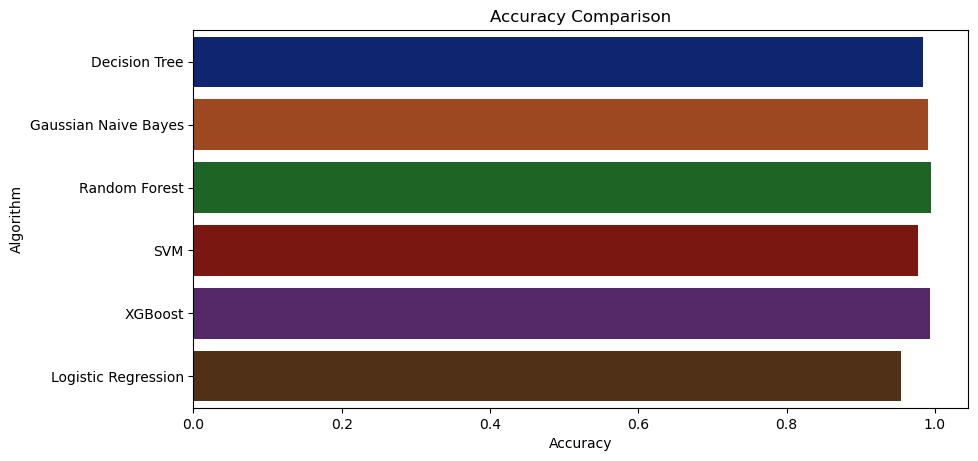

In [123]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [125]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

Decision Tree --> 98.4090909090909
Gaussian Naive Bayes --> 99.0909090909091
Random Forest --> 99.54545454545455
SVM --> 97.72727272727273
XGBoost --> 99.31818181818181
Logistic Regression --> 95.45454545454545


Predicting:

In [134]:
data = np.array([[134,18, 30, 23.603016, 60.3, 8, 140.91]])
prediction = DecisionTree.predict(data)
print(prediction)

['coffee']


In [136]:
data = np.array([[12,10, 30, 2.603016, 90.67, 80, 140.91]])
prediction = randomfclf.predict(data)
print(prediction)

['coconut']
